In [19]:
!python scDREAMER_run.py

2
===== Using device: cuda:0
Epoch : 0 c loss: 2.355932908567044 b loss: 0.505937624590199
Epoch : 0 a loss: 558.4130479413059
Epoch : 1 c loss: 2.1657442047661943 b loss: 0.46729670058597217
Epoch : 1 a loss: 472.0817412726964
Epoch : 2 c loss: 2.198977800226023 b loss: 0.4086026933353409
Epoch : 2 a loss: 458.93670593985456
Epoch : 3 c loss: 2.2375379833779316 b loss: 0.3604425705468702
Epoch : 3 a loss: 448.4715915122051
Epoch : 4 c loss: 2.234476794367251 b loss: 0.32590742638930975
Epoch : 4 a loss: 441.35400089067906
Epoch : 5 c loss: 2.2060028922416475 b loss: 0.3256282251578546
Epoch : 5 a loss: 435.30325232946825
Epoch : 6 c loss: 2.164685833124304 b loss: 0.27555920696070074
Epoch : 6 a loss: 427.7167579138232
Epoch : 7 c loss: 2.1181211466845786 b loss: 0.2093362891862515
Epoch : 7 a loss: 421.54454963292056
Epoch : 8 c loss: 2.0812467190587944 b loss: -0.0856070612836077
Epoch : 8 a loss: 415.94362920828956
Epoch : 9 c loss: 2.045866254290102 b loss: -0.16179437785162756
Ep

Epoch : 80 c loss: 1.8944265295865508 b loss: -0.17344547044706674
Epoch : 80 a loss: 282.0380128400599
Epoch : 81 c loss: 1.8927376732053494 b loss: -0.18271761238869472
Epoch : 81 a loss: 281.97492076285744
Epoch : 82 c loss: 1.895208249921384 b loss: -0.18698466929934712
Epoch : 82 a loss: 281.9396643355901
Epoch : 83 c loss: 1.8930835931197456 b loss: -0.18694637044380777
Epoch : 83 a loss: 281.2979509557189
Epoch : 84 c loss: 1.8877391744508103 b loss: -0.18913818948824887
Epoch : 84 a loss: 282.8027389586679
Epoch : 85 c loss: 1.8956214010479893 b loss: -0.17260121114610918
Epoch : 85 a loss: 281.73782825093025
Epoch : 86 c loss: 1.8960620758561748 b loss: -0.1915012823174829
Epoch : 86 a loss: 281.9600330699574
Epoch : 87 c loss: 1.9045647806800872 b loss: -0.18468001945746745
Epoch : 87 a loss: 280.891176005126
Epoch : 88 c loss: 1.8980814543637363 b loss: -0.18717724239461037
Epoch : 88 a loss: 281.1159821159755
Epoch : 89 c loss: 1.896072152103831 b loss: -0.1914156981018692


In [2]:
import scanpy as sc
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi

In [4]:
# Plotting...
import scanpy as sc
import pandas as pd

name = "Lung" #"Pancreas"
data_path = "../Pan/Pancreas.h5ad"
data_path = "../Lung/Lung_NA_0.5.h5ad" #Lung_NA_0.5.h5ad, Lung_atlas_public

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation', # 16
                 'Lung' : 'cell_type', # 
                 'Pancreas' : 'celltype', #
                 'Human_Mouse' : "celltype", #
                 "Human_Retina":"Subcluster" #  
                  }  

Ann = sc.read_h5ad(data_path)

In [5]:
Ann

AnnData object with n_obs × n_vars = 32472 × 15148
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor', 'cell_type_NA'
    layers: 'counts'

In [20]:
#_latent_matrix_run1, 
z = pd.read_csv("./output/" + name + "/" + name + "_latent_matrix.csv", header = None).to_numpy()
z.shape

(32472, 10)

In [246]:
z

array([[-0.8109864 , -0.48138291, -0.8454684 , ...,  0.8967523 ,
        -1.02169168, -1.15220141],
       [-0.69693124, -0.86785477,  1.59765363, ...,  2.47157192,
         0.97861105,  0.51785499],
       [-0.69896269, -1.04608452, -0.75845331, ...,  0.50704741,
        -0.45687222,  0.23749727],
       ...,
       [ 3.63866925,  5.19510889,  2.90038919, ...,  4.18223715,
        -1.44334722,  4.85485125],
       [ 0.63464653,  3.6873138 ,  2.94645691, ...,  6.6515255 ,
        -0.83993292,  4.26956558],
       [ 2.33163977,  8.17599487,  1.43525326, ...,  7.73256445,
        -1.00752521,  5.12749863]])

/home/ajita/anaconda3/envs/scdreamer_py/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


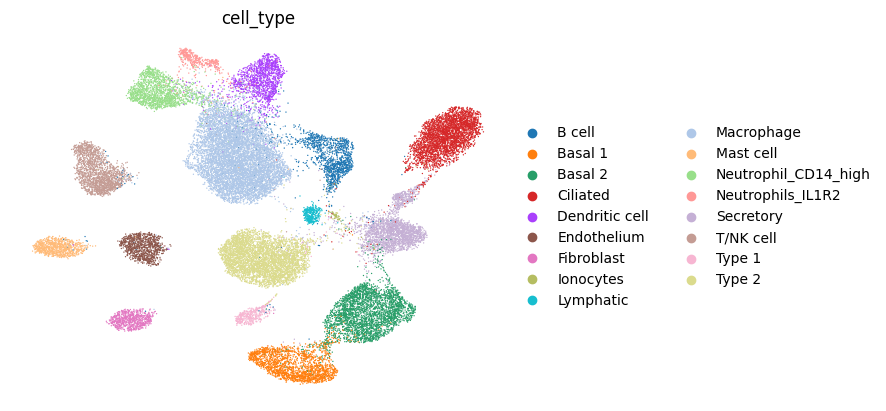

None


/home/ajita/anaconda3/envs/scdreamer_py/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


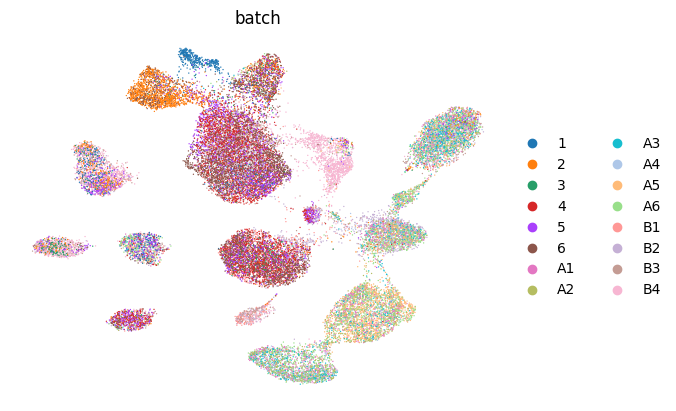

None


In [21]:
Ann.obsm["final_embeddings"] = z

cell_type = cell_type_key_dic[name]
batch = batch_key_dic[name]

sc.pp.neighbors(Ann, use_rep = 'final_embeddings') #use_rep = 'final_embeddings'
sc.tl.umap(Ann)

img = sc.pl.umap(Ann, color = cell_type, frameon = False) # cells
print(img)


#Ann.obs['batch'] = self.batch_info.astype(str)
img2 = sc.pl.umap(Ann, color = batch, frameon = False)
print(img2)

In [115]:
z

array([[ 2.83191347,  2.86971569,  4.57172298, ...,  2.79556918,
         2.27362943,  1.67386818],
       [ 2.89478159,  0.23030636,  4.71732712, ...,  0.87584174,
        -0.84806395,  0.545147  ],
       [ 1.85967553,  1.30466509,  7.40371847, ...,  1.64713907,
        -0.14427024,  1.19402719],
       ...,
       [-0.06750754,  1.99970579, -1.16514027, ..., -0.41403735,
        -0.46525079, -0.72012377],
       [ 1.22001028, -0.27435815, -1.10698593, ...,  2.65703368,
        -0.84011382, -0.80245543],
       [-0.64909577,  0.5567286 , -1.12823331, ...,  1.73992753,
         0.84277302, -0.93171448]])